# Goals



### Train a blood cell type classifier using resnet v1 and v2 variants

### Understand what all differences happen when switching between resnets variants 

### Understand bigger and deeper network not always means better results

#### For this experiment you will be using mxnet backend

# What is resnet

## Readings on resnet

  1) Points from https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035
    - The core idea of ResNet is introducing a so-called “identity shortcut connection” that skips one or more layers
    - The deeper model should not produce a training error higher than its shallower counterparts.
    - solves the problem of vanishing gradiens as network depth increased - https://medium.com/@anishsingh20/the-vanishing-gradient-problem-48ae7f501257
    
    
 
  2) Points from https://medium.com/@14prakash/understanding-and-implementing-architectures-of-resnet-and-resnext-for-state-of-the-art-image-cf51669e1624
    - Won 1st place in the ILSVRC 2015 classification competition with top-5 error rate of 3.57% (An ensemble model)
    - Efficiently trained networks with 100 layers and 1000 layers also.
    - Replacing VGG-16 layers in Faster R-CNN with ResNet-101. They observed a relative improvements of 28%
    

  3) Read more here
    - https://arxiv.org/abs/1512.03385
    - https://d2l.ai/chapter_convolutional-modern/resnet.html
    - https://cv-tricks.com/keras/understand-implement-resnets/
    - https://mc.ai/resnet-architecture-explained/




# Table of Contents


## [0. Install](#0)


## [1. Train experiment with resnet-50-v1 architecture and validate](#1)


## [2. Train experiment with resnet-50-v2 architecture and validate](#2)


## [3. Compare all the experiments](#3)

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [1]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 3352, done.
remote: Total 3352 (delta 0), reused 0 (delta 0), pack-reused 3352
Receiving objects: 100% (3352/3352), 82.71 MiB | 426.00 KiB/s, done.
Resolving deltas: 100% (1994/1994), done.


In [ ]:
# If using Colab install using the commands below
!cd monk_v1/installation/Misc && pip install -r requirements_colab.txt

# If using Kaggle uncomment the following command
#!cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt

# Select the requirements file as per OS and CUDA version when using a local system or cloud
#!cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt

## Dataset - Chest X-ray Pneumonia Dataset
    - https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1myx6OZ3l4spNvGrYFgwgeYXX6ebyjLBY' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1myx6OZ3l4spNvGrYFgwgeYXX6ebyjLBY" -O chest-xray-pneumonia.zip && rm -rf /tmp/cookies.txt

In [2]:
! unzip -qq chest-xray-pneumonia.zip

# Imports

In [2]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [3]:
#Using mxnet-gluon backend 
from gluon_prototype import prototype

<a id='1'></a>
# Train experiment with resnet-50-v1 architecture and validate

In [4]:
# Load experiment

gtf = prototype(verbose=1);
gtf.Prototype("Compare-resnet-v1-v2", "resnet50-v1");


# Insert data and set params in default mode
gtf.Default(dataset_path="chest-xray-pneumonia/train", 
            model_name="resnet50_v1", 
            freeze_base_network=False,
            num_epochs=5);


Mxnet Version: 1.5.0

Experiment Details
    Project: Compare-resnet-v1-v2
    Experiment: resnet50-v1
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/5_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-v2/resnet50-v1/

Dataset Details
    Train path:     chest-xray-pneumonia/train
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 3651
    Num val images:   1565
    Num classes:      2

Model Params
    Model na

monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


In [5]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed


Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.938, Train-loss: 0.160 | Val-acc: 0.965495, Val-loss: 0.096, | time: 63.2 sec

    Epoch 2/5
    ----------




    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.976, Train-loss: 0.067 | Val-acc: 0.978914, Val-loss: 0.066, | time: 61.9 sec

    Epoch 3/5
    ----------




    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.986, Train-loss: 0.036 | Val-acc: 0.982748, Val-loss: 0.046, | time: 61.8 sec

    Epoch 4/5
    ----------




    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.991, Train-loss: 0.025 | Val-acc: 0.974441, Val-loss: 0.079, | time: 61.6 sec

    Epoch 5/5
    ----------




    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.995, Train-loss: 0.014 | Val-acc: 0.978914, Val-loss: 0.061, | time: 61.3 sec

    Training completed in: 5m 7s
    Best val Acc:          0.982748

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/5_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-v2/resnet50-v1/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/5_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-v2/resnet50-v1/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history l

<Figure size 432x288 with 0 Axes>

In [7]:
# Load for validation

gtf = prototype(verbose=1);
gtf.Prototype("Compare-resnet-v1-v2", "resnet50-v1", eval_infer=True);


# Set dataset
gtf.Dataset_Params(dataset_path="chest-xray-pneumonia/test");
gtf.Dataset();


# Validate
accuracy, class_based_accuracy = gtf.Evaluate();

Mxnet Version: 1.5.0

Model Details
    Loading model - workspace/Compare-resnet-v1-v2/resnet50-v1/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Compare-resnet-v1-v2
    Experiment: resnet50-v1
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/5_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-v2/resnet50-v1/

Dataset Details
    Test path:      chest-xray-pneumonia/test
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   4

Pre-Composed Test Transforms
[{'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num test images: 624
    Num classes:      2

Testing



    Result
        class based accuracies
            0. NORMAL - 53.84615384615385 %
            1. PNEUMONIA - 99.74358974358975 %
        total images:            624
        num correct predictions: 515
        Average accuracy (%):    82.53205128205127



<a id='2'></a>
# Train experiment with resnet-50-v2 architecture and validate

In [8]:
# Load experiment

gtf = prototype(verbose=1);
gtf.Prototype("Compare-resnet-v1-v2", "resnet50-v2");


# Insert data and set params in default mode
gtf.Default(dataset_path="chest-xray-pneumonia/train", 
            model_name="resnet50_v2", 
            freeze_base_network=False,
            num_epochs=5);

Mxnet Version: 1.5.0

Experiment Details
    Project: Compare-resnet-v1-v2
    Experiment: resnet50-v2
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/5_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-v2/resnet50-v2/

Dataset Details
    Train path:     chest-xray-pneumonia/train
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 3651
    Num val images:   1565
    Num classes:      2

Model Params
    Model na

monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


In [9]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.912, Train-loss: 0.238 | Val-acc: 0.948243, Val-loss: 0.174, | time: 63.9 sec

    Epoch 2/5
    ----------




    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.961, Train-loss: 0.118 | Val-acc: 0.963578, Val-loss: 0.128, | time: 65.2 sec

    Epoch 3/5
    ----------




    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.977, Train-loss: 0.070 | Val-acc: 0.969968, Val-loss: 0.186, | time: 62.2 sec

    Epoch 4/5
    ----------




    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.980, Train-loss: 0.080 | Val-acc: 0.974441, Val-loss: 0.118, | time: 62.5 sec

    Epoch 5/5
    ----------




    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.987, Train-loss: 0.056 | Val-acc: 0.973163, Val-loss: 0.105, | time: 62.4 sec

    Training completed in: 5m 15s
    Best val Acc:          0.974441

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/5_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-v2/resnet50-v2/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/5_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-v2/resnet50-v2/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history 

<Figure size 432x288 with 0 Axes>

In [10]:
# Load for validation

gtf = prototype(verbose=1);
gtf.Prototype("Compare-resnet-v1-v2", "resnet50-v2", eval_infer=True);


# Set dataset
gtf.Dataset_Params(dataset_path="chest-xray-pneumonia/test");
gtf.Dataset();


# Validate
accuracy, class_based_accuracy = gtf.Evaluate();

Mxnet Version: 1.5.0

Model Details
    Loading model - workspace/Compare-resnet-v1-v2/resnet50-v2/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Compare-resnet-v1-v2
    Experiment: resnet50-v2
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/5_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-v2/resnet50-v2/

Dataset Details
    Test path:      chest-xray-pneumonia/test
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   4

Pre-Composed Test Transforms
[{'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num test images: 624
    Num classes:      2

Testing



    Result
        class based accuracies
            0. NORMAL - 54.27350427350427 %
            1. PNEUMONIA - 99.48717948717949 %
        total images:            624
        num correct predictions: 515
        Average accuracy (%):    82.53205128205127



<a id='11'></a>
# Comparing all the experiments

In [12]:
# Invoke the comparison class
from compare_prototype import compare

### Creating and managing comparison experiments
        - Provide project name

In [13]:
# Create a project 
gtf = compare(verbose=1);
gtf.Comparison("Compare-effect-of-network-versions");

Comparison: - Compare-effect-of-network-versions


### This creates files and directories as per the following structure
    
    workspace
        |
        |--------comparison
                        |
                        |
                        |-----Compare-effect-of-network-versions
                                    |
                                    |------stats_best_val_acc.png
                                    |------stats_max_gpu_usage.png
                                    |------stats_training_time.png
                                    |------train_accuracy.png
                                    |------train_loss.png
                                    |------val_accuracy.png
                                    |------val_loss.png
                                    
                        |
                        |-----comparison.csv (Contains necessary details of all experiments)

### Add the experiments
        - First argument - Project name
        - Second argument - Experiment name

In [14]:
gtf.Add_Experiment("Compare-resnet-v1-v2", "resnet50-v1");
gtf.Add_Experiment("Compare-resnet-v1-v2", "resnet50-v2");

Project - Compare-resnet-v1-v2, Experiment - resnet50-v1 added
Project - Compare-resnet-v1-v2, Experiment - resnet50-v2 added


## Run Analysis

In [15]:
gtf.Generate_Statistics();

Generating statistics...
Generated



<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

## Visualize and study comparison metrics

### Training Accuracy Curves

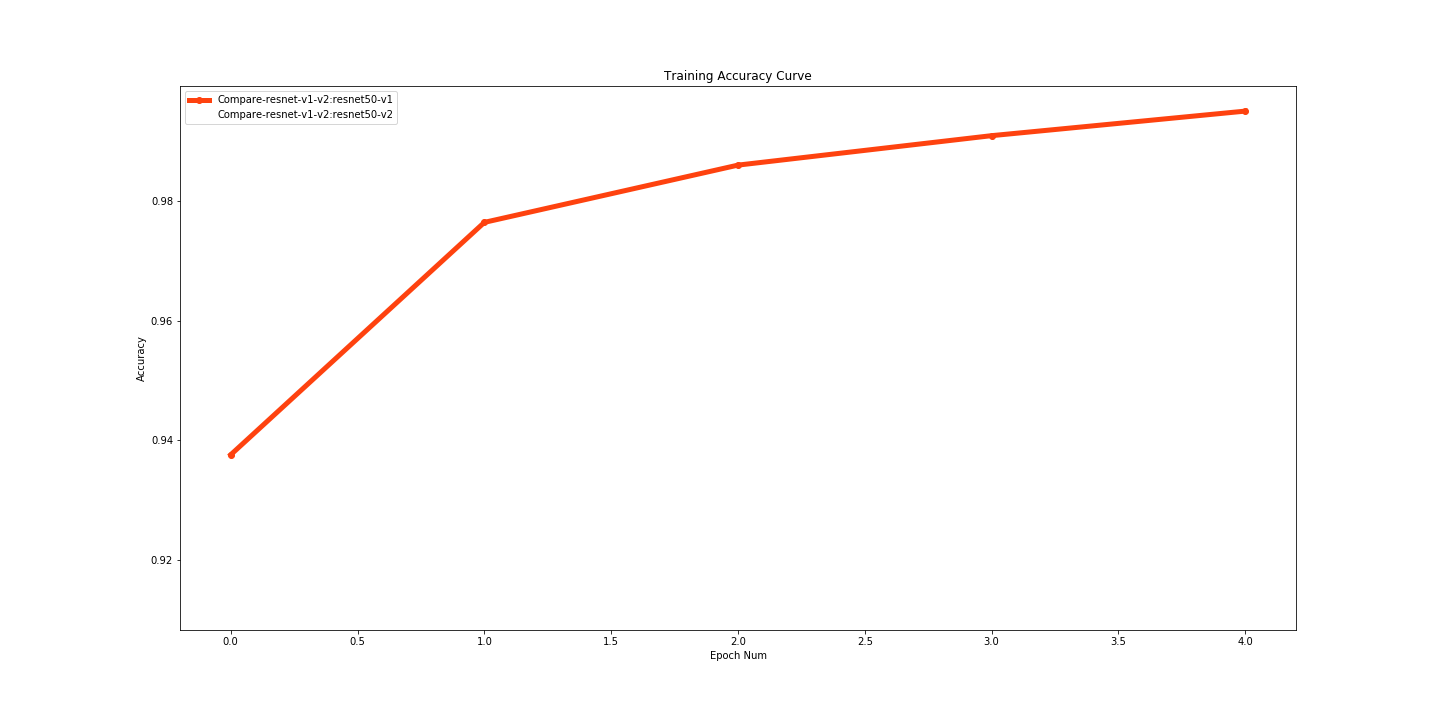

In [16]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-network-versions/train_accuracy.png") 

### Training Loss Curves

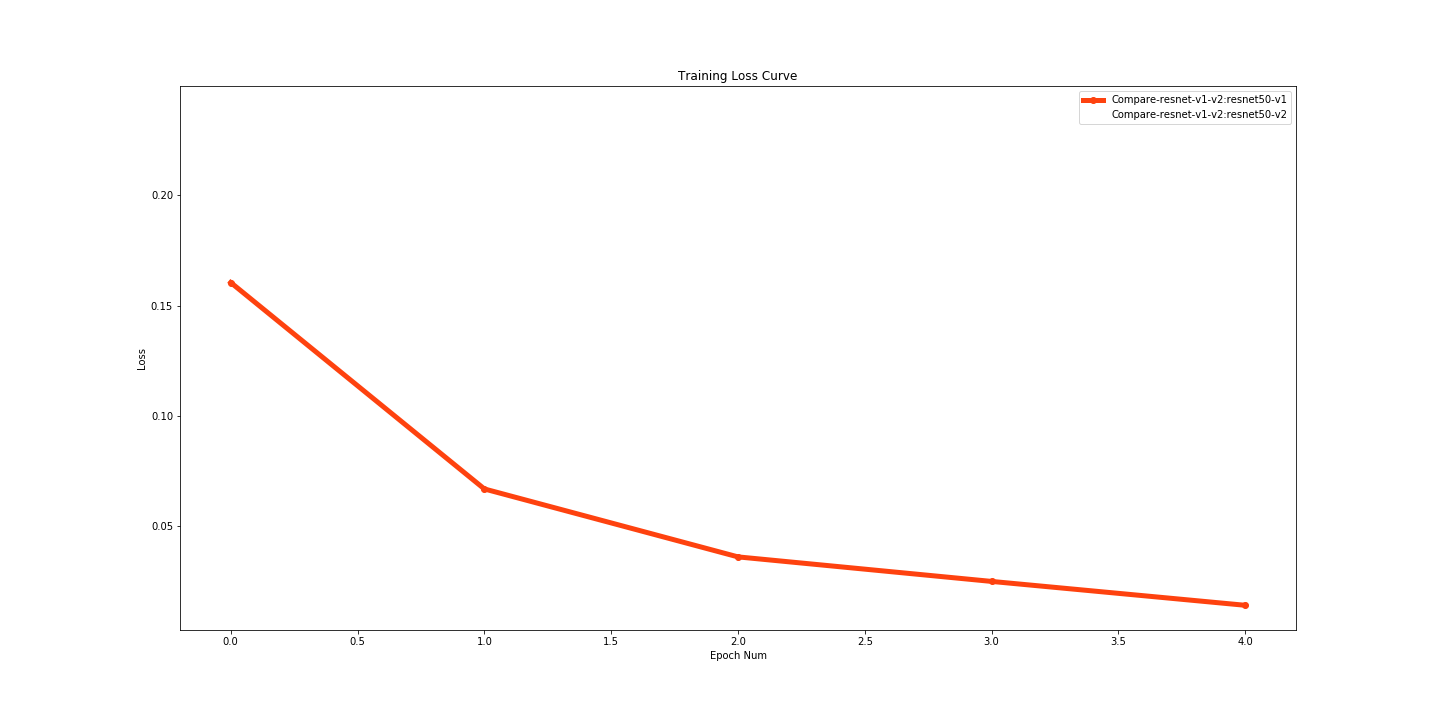

In [17]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-network-versions/train_loss.png") 

### Validation Accuracy Curves

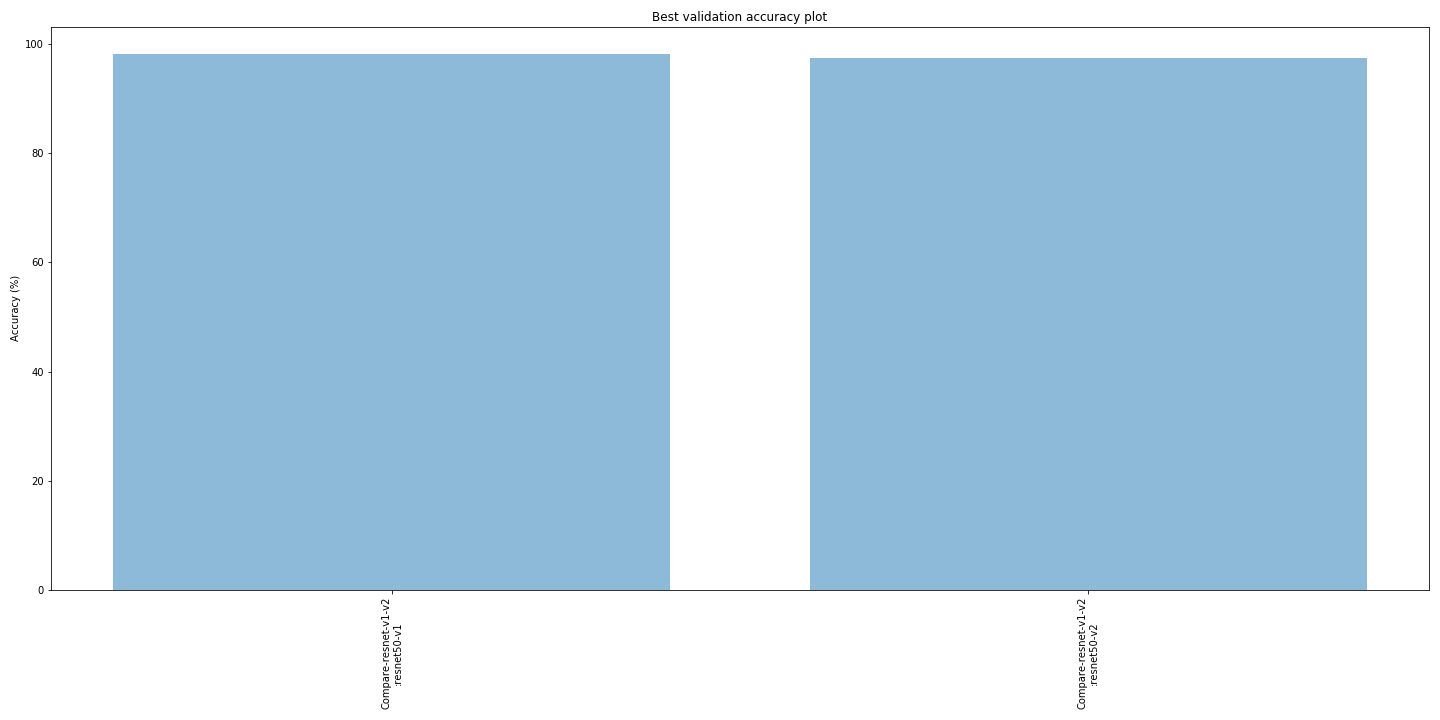

In [24]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-network-versions/stats_best_val_acc.png") 

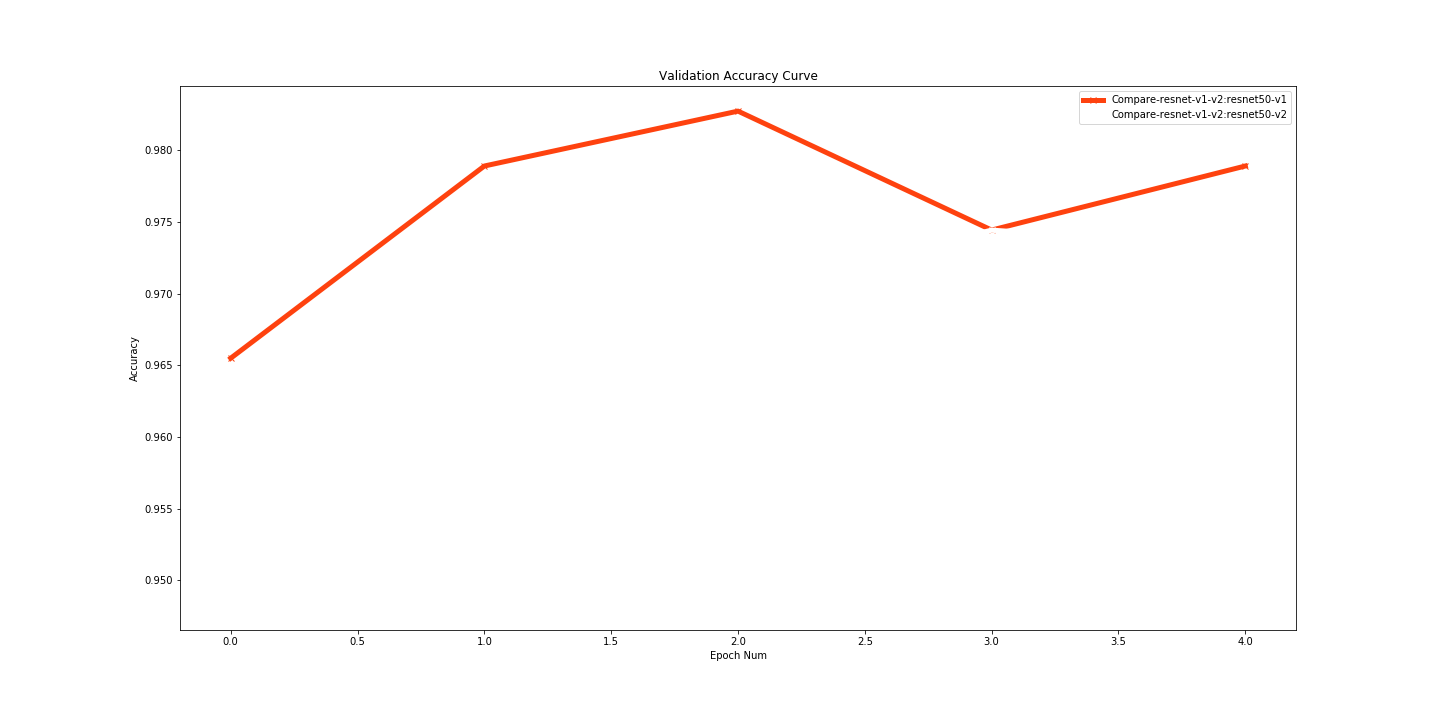

In [18]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-network-versions/val_accuracy.png") 

### Validation loss curves

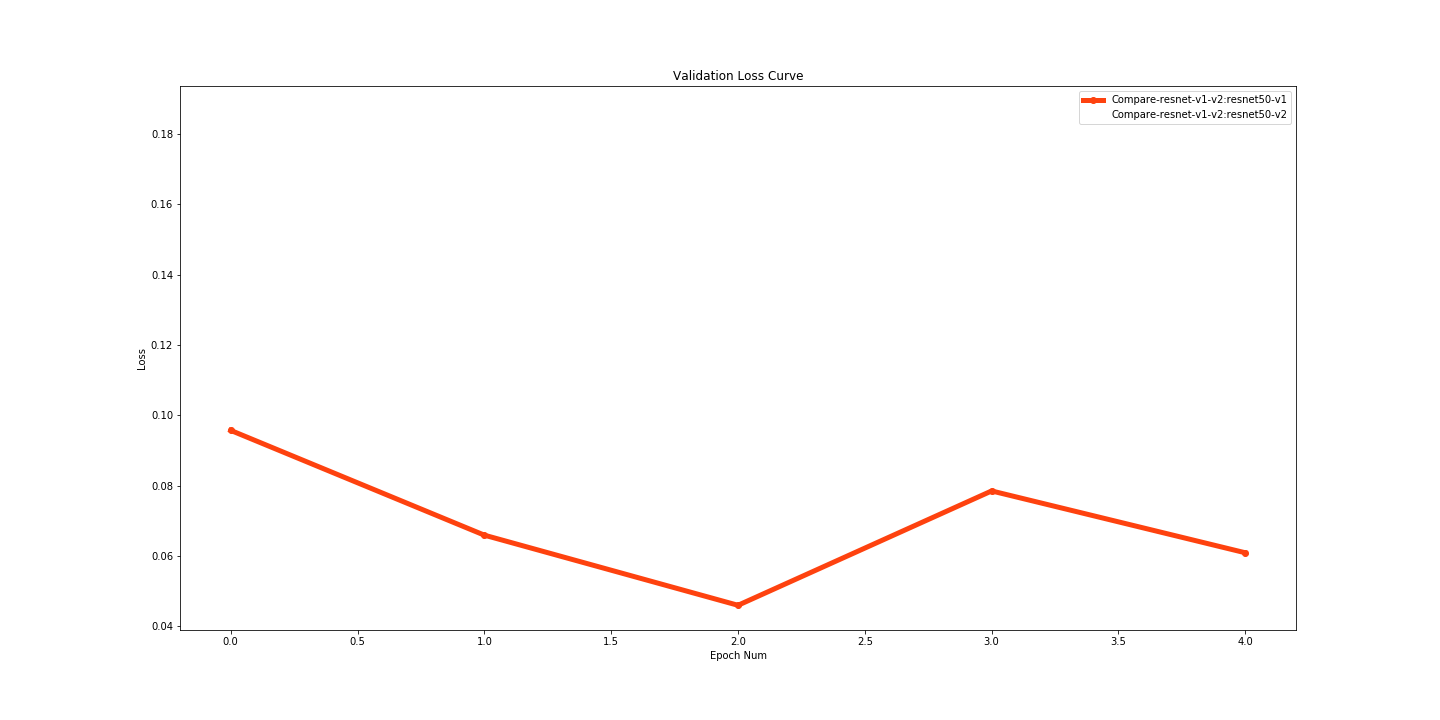

In [19]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-network-versions/val_loss.png") 

### Training Times and max gpu usages

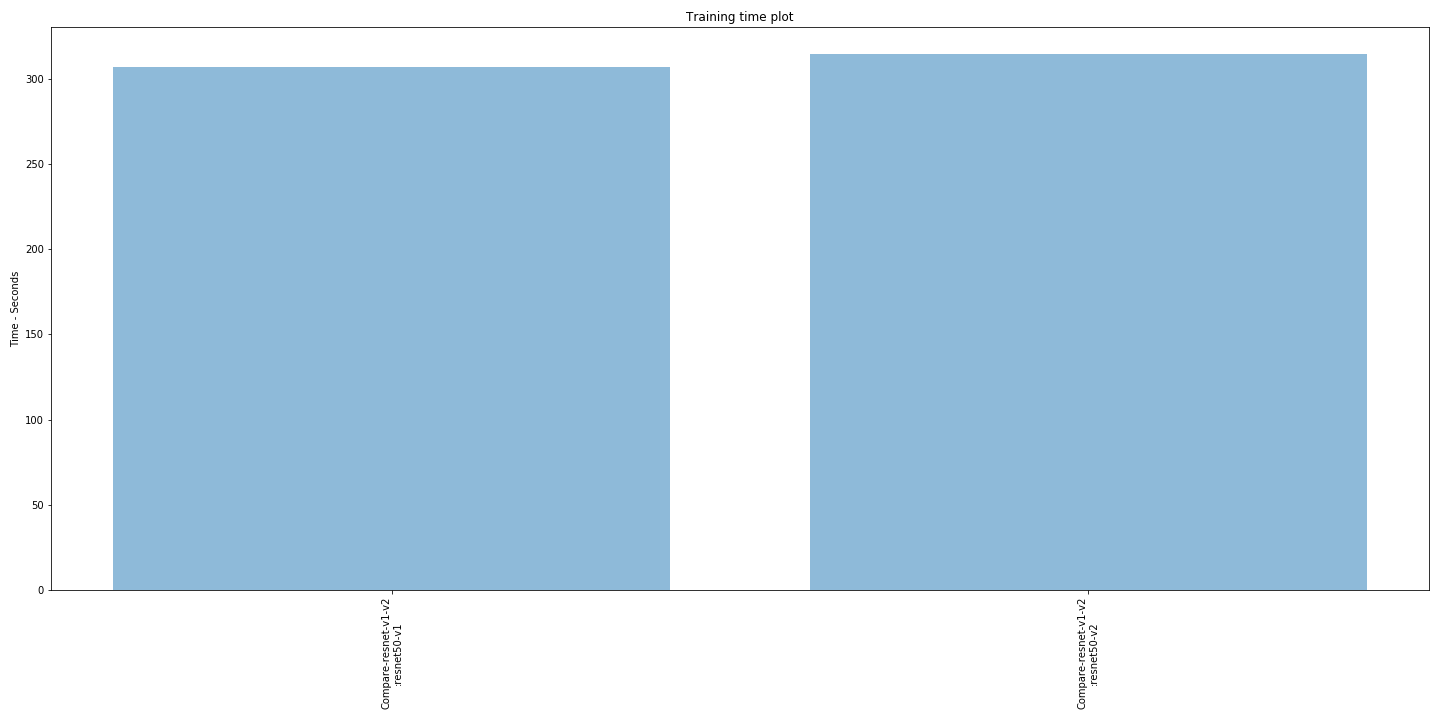

In [20]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-network-versions/stats_training_time.png") 

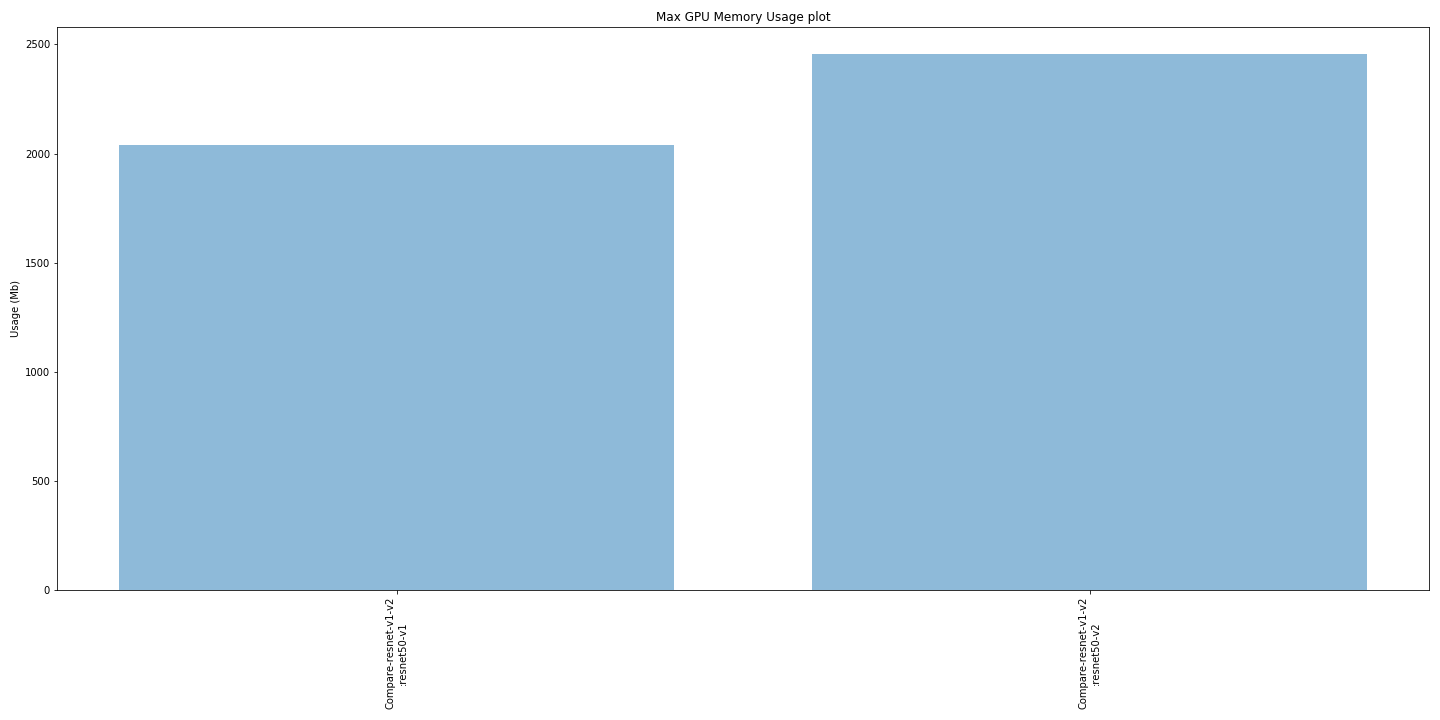

In [21]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-network-versions/stats_max_gpu_usage.png") 